## Unemployment Analysis

### Importing Libraries

In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Dataset

df = pd.read_csv(r"C:\Users\tejas\Documents\OIBSIP\Unemployment in India.csv")
df.head()

### Exploratory Data Analysis

In [211]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [213]:
df.shape

(768, 7)

In [214]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [215]:
df.columns = df.columns.str.strip()

In [216]:
df['Date'].head()

0     31-05-2019
1     30-06-2019
2     31-07-2019
3     31-08-2019
4     30-09-2019
Name: Date, dtype: object

In [217]:
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [218]:
df['Date'] = pd.to_datetime(df['Date'].str.strip(), format='%d-%m-%Y', errors='coerce')

In [219]:
df['Year']= df['Date'].dt.year
df['Month']= df['Date'].dt.month
df['Day']= df['Date'].dt.day

In [220]:
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Area',
       'Year', 'Month', 'Day'],
      dtype='object')

In [221]:
df[['Date','Year','Month','Day']].head()

,Date,Year,Month,Day
0,2019-05-31,2019.0,5.0,31.0
1,2019-06-30,2019.0,6.0,30.0
2,2019-07-31,2019.0,7.0,31.0
3,2019-08-31,2019.0,8.0,31.0
4,2019-09-30,2019.0,9.0,30.0


In [222]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [223]:
df.dropna(subset=['Year','Month','Day','Estimated Unemployment Rate (%)','Estimated Employed','Estimated Labour Participation Rate (%)'],inplace=True)

In [224]:
print(df.columns)

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Area',
       'Year', 'Month', 'Day'],
      dtype='object')


In [225]:
df.describe()

,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Year,Month,Day
count,740,740.000000,7.400000e+02,740.000000,740.000000,740.000000,740.000000
mean,2019-12-12 18:36:58.378378496,11.787946,7.204460e+06,42.630122,2019.418919,6.390541,30.502703
min,2019-05-31 00:00:00,0.000000,4.942000e+04,13.330000,2019.000000,1.000000,29.000000
25%,2019-08-31 00:00:00,4.657500,1.190404e+06,38.062500,2019.000000,4.000000,30.000000
50%,2019-11-30 00:00:00,8.350000,4.744178e+06,41.160000,2019.000000,6.000000,31.000000
75%,2020-03-31 00:00:00,15.887500,1.127549e+07,45.505000,2020.000000,9.000000,31.000000
max,2020-06-30 00:00:00,76.740000,4.577751e+07,72.570000,2020.000000,12.000000,31.000000
std,NaN,10.721298,8.087988e+06,8.111094,0.493716,3.235070,0.627509


### Time Series Analysis

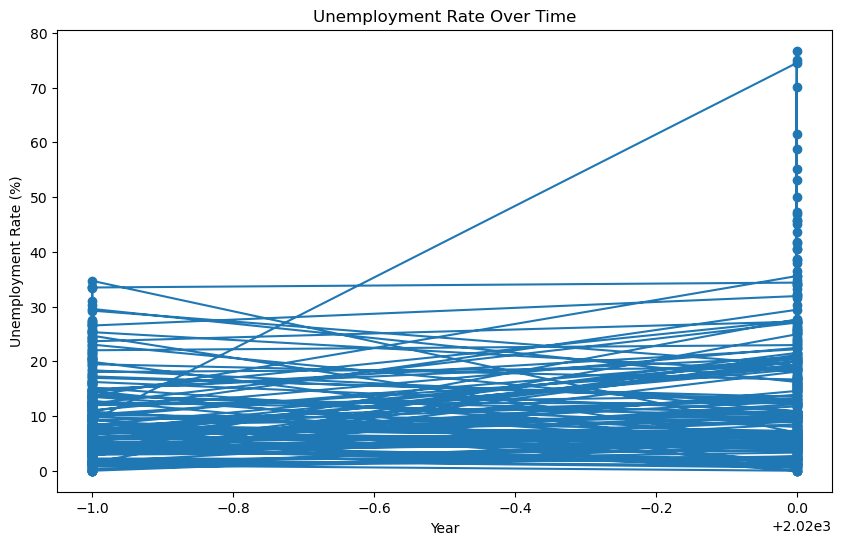

In [227]:
plt.figure(figsize=(10,6))
plt.plot(df['Year'], df['Estimated Unemployment Rate (%)'], marker='o')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.show()

### Regional Analysis

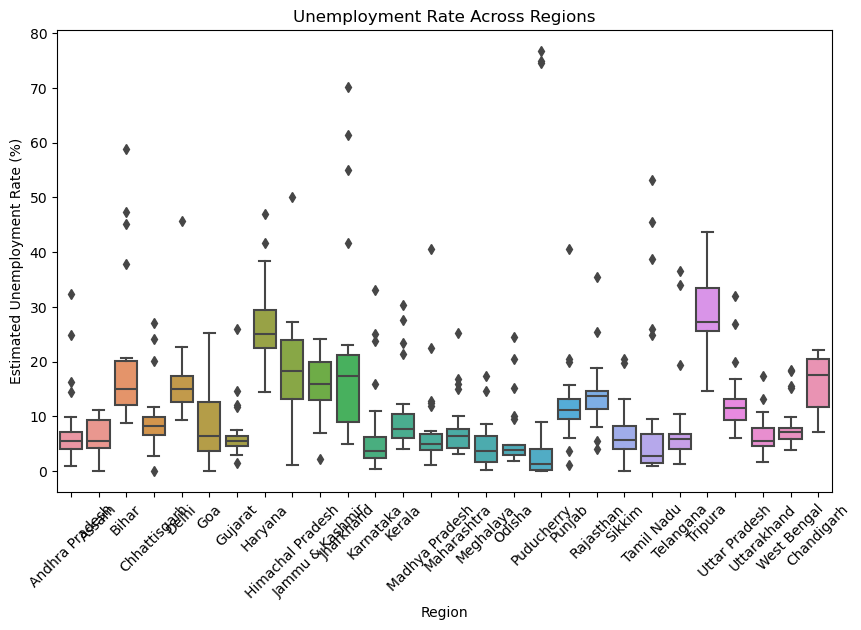

In [228]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Region', y='Estimated Unemployment Rate (%)', data=df)
plt.title('Unemployment Rate Across Regions')
plt.xticks(rotation=45)
plt.show()

### Correaltion Analysis

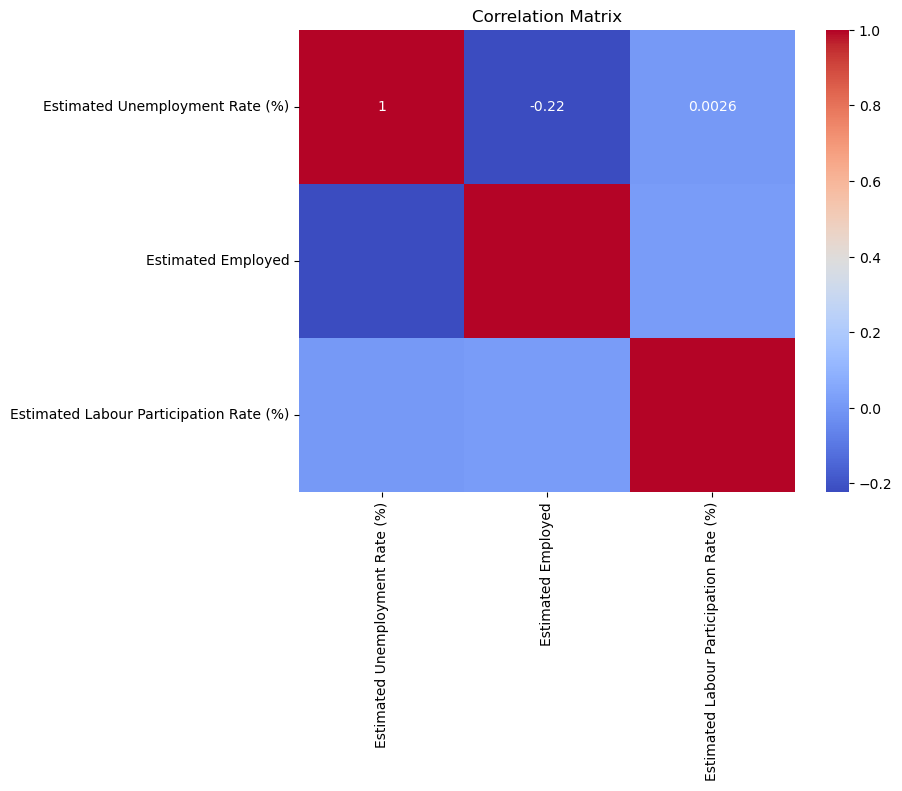

In [237]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Seasonality Analysis

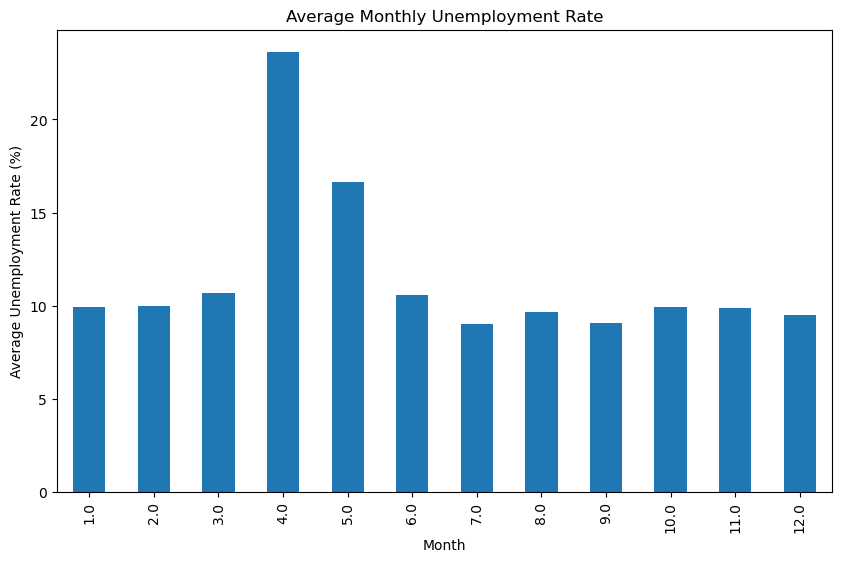

In [239]:
monthly_data = df.groupby('Month')['Estimated Unemployment Rate (%)'].mean()
plt.figure(figsize=(10,6))
monthly_data.plot(kind='bar')
plt.title('Average Monthly Unemployment Rate')
plt.xlabel('Month')
plt.ylabel('Average Unemployment Rate (%)')
plt.show()

### Average Unemployment Rate by Region

In [240]:
avg_unemp_rate = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index()

In [241]:
avg_unemp_rate.sort_values(by='Estimated Unemployment Rate (%)', ascending=False, inplace=True)

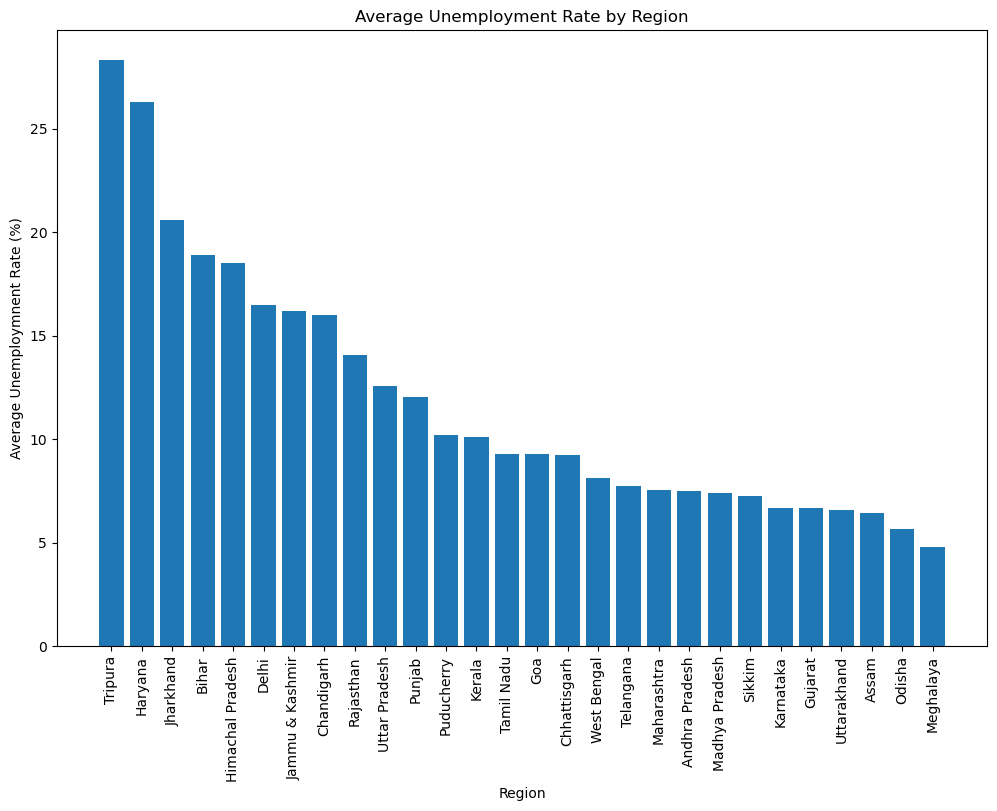

In [244]:
plt.figure(figsize=(12,8))
plt.bar(avg_unemp_rate['Region'], avg_unemp_rate['Estimated Unemployment Rate (%)'], color='#1f77b4')
plt.title('Average Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Average Unemploymnent Rate (%)')
plt.xticks(rotation=90)
plt.show()

### So the top 5 most affected states in India during Covid-19 in case of unemployment were:
#### Tripura
#### Haryana
#### Jharkhand
#### Bihar
#### Himachal Pradesh